In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# The Pandas Series Object

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data.index

Int64Index([2, 5, 3, 7], dtype='int64')

# Series as specialized dictionary and constructing Series

In [10]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
population['Texas':'Florida']

Texas       26448193
New York    19651127
Florida     19552860
dtype: int64

In [12]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [13]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [14]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

# Data Frame

In [15]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [16]:
states = pd.DataFrame({'population': population,
                       'area': area})
states


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [17]:
display(states.index)
display(states.columns)
display(states.values)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Index(['population', 'area'], dtype='object')

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]], dtype=int64)

In [18]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

# Constructing DataFrame objects

In [19]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [20]:
data = [{'a': i + 2, 'b': 2 * i}
        for i in range(5)]
pd.DataFrame(data)


,a,b
0,2,0
1,3,2
2,4,4
3,5,6
4,6,8


In [21]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [22]:
pd.DataFrame({'population': population,
              'area': area})


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [23]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])


,foo,bar
a,0.462226,0.120436
b,0.308166,0.089129
c,0.779963,0.123711


In [24]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

# Indexes

In [25]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

Indexes are immutable

In [26]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
display(indA.intersection(indB))
display(indA.union(indB))
display(indA.difference(indB))
display(indA.symmetric_difference(indB))

Int64Index([3, 5, 7], dtype='int64')

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

Int64Index([1, 9], dtype='int64')

Int64Index([1, 2, 9, 11], dtype='int64')

# Data Selection in Series

In [27]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd']
                 )
data


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [28]:
data['b']

0.5

In [29]:
'a' in data

True

In [30]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [31]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [32]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [33]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [34]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [35]:
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

# Indexers: loc, iloc

In [36]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

First, the loc attribute allows indexing and slicing that always references the explicit
index

In [37]:
display(data.loc[1])
display(data.loc[1:3])

'a'

1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit
Python-style index:

In [38]:
display(data.iloc[1])
display(data.iloc[1:3])

'b'

3    b
5    c
dtype: object

# Data Selection in DataFrame

In [39]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area': area, 'pop': pop})
data


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [40]:
display(data.area is data['area'])
display(data.pop is data['pop'])

True

False

In [41]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [42]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [43]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [44]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [45]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [46]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [47]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# Operating on Data in Pandas

In [48]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [49]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [50]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

# UFuncs: Index Alignment

In [51]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967},
                 name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127},
                       name='population')
display(population / area)
display(area.index.union(population.index))

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [52]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [53]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [54]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('AB'))
display(A)

B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('BAC'))
display(B)

,A,B
0,1,11
1,5,1


,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [55]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [56]:
A.stack()

0  A     1
   B    11
1  A     5
   B     1
dtype: int32

In [57]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


# Ufuncs: Operations Between DataFrame and Series

In [58]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [59]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [60]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [61]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [62]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [63]:
halfrow = df.iloc[0, ::2]
halfrowhalfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [64]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling Missing Data

## None

In [65]:
# None is the object, not int/float
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [66]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
53.9 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.63 ms ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



## NaN

In [67]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [68]:
1 + np.nan

nan

In [69]:
vals2.sum()

nan

In [70]:
np.nansum(vals2)

8.0

## None and NaN in Pandas

In [71]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [72]:
x = pd.Series(range(2), dtype=int)
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

In [73]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [74]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [75]:
data.dropna()

0        1
2    hello
dtype: object

In [76]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [77]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [78]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


Drop all the columns or rows that contain only nulls

In [79]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [80]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Thresh param means that how many non-null values should be in data

In [81]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [82]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


## Filling null values

In [83]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [84]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [85]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [86]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [87]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [88]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [89]:
df.fillna(method='bfill', axis=0)

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


# Hierarchical Indexing

## Multi-indexing

In [90]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

Bad way

In [91]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [92]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

Good way

In [93]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [94]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

## MultiIndex as extra dimension

In [95]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [96]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [97]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [98]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

In [99]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df


data1     data2
a 1  0.903060  0.171197
  2  0.646993  0.119489
b 1  0.599717  0.877496
  2  0.597233  0.498191

In [100]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)


California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [101]:
print(pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]))
print(pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]))
print(pd.MultiIndex.from_product([['a', 'b'], [1, 2]]))
print(pd.MultiIndex([['a', 'b'], [1, 2]], [[0, 0, 1, 1], [0, 1, 0, 1]]))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


## MultiIndex level names

In [102]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## MultiIndex for columns

In [103]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index=index, columns=columns)
health_data


subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  38.0  35.0  36.5  29.0  38.3
     2      15.0  38.6  37.0  36.0  40.0  36.6
2014 1      36.0  35.9  32.0  36.4  32.0  37.6
     2      46.0  36.8  29.0  38.7  57.0  36.0

In [104]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      35.0  36.5
     2      37.0  36.0
2014 1      32.0  36.4
     2      29.0  38.7

## Indexing and Slicing a MultiIndex

In [105]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [106]:
pop['California', 2000]

33871648

In [107]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [108]:
pop.loc['California':'Texas']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [109]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [110]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [111]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [112]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  38.0  35.0  36.5  29.0  38.3
     2      15.0  38.6  37.0  36.0  40.0  36.6
2014 1      36.0  35.9  32.0  36.4  32.0  37.6
     2      46.0  36.8  29.0  38.7  57.0  36.0

In [113]:
health_data['Guido', 'HR']

year  visit
2013  1        35.0
      2        37.0
2014  1        32.0
      2        29.0
Name: (Guido, HR), dtype: float64

In [114]:
health_data.iloc[:3, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      30.0  38.0
     2      15.0  38.6
2014 1      36.0  35.9

In [115]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        30.0
      2        15.0
2014  1        36.0
      2        46.0
Name: (Bob, HR), dtype: float64

In [116]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,30.0,35.0,29.0
2014,1,36.0,32.0,32.0


## Rearranging Multi-Indices

In [117]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.376401
      2      0.305959
c     1      0.818088
      2      0.592073
b     1      0.335160
      2      0.674590
dtype: float64

### Wery importent to sort indexes

In [118]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)


<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [119]:
data = data.sort_index()
data

char  int
a     1      0.376401
      2      0.305959
b     1      0.335160
      2      0.674590
c     1      0.818088
      2      0.592073
dtype: float64

In [120]:
data['a':'b']

char  int
a     1      0.376401
      2      0.305959
b     1      0.335160
      2      0.674590
dtype: float64

## Stacking and unstacking indices

In [121]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [122]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [123]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [124]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Index setting and resetting

In [125]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [126]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [127]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

In [128]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  38.0  35.0  36.5  29.0  38.3
     2      15.0  38.6  37.0  36.0  40.0  36.6
2014 1      36.0  35.9  32.0  36.4  32.0  37.6
     2      46.0  36.8  29.0  38.7  57.0  36.0

In [129]:
data_mean = health_data.groupby(level="year").mean()
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     22.5  38.30  36.0  36.25  34.5  37.45
2014     41.0  36.35  30.5  37.55  44.5  36.80

In [130]:
data_mean.groupby('type', axis=1).mean()

type,HR,Temp
year,,
2013,31.000000,37.333333
2014,38.666667,36.900000


# Combining Datasets: concat and append

In [131]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [132]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [133]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [134]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display(df1, df2, pd.concat([df1, df2]))

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [135]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display(df3, df4, pd.concat([df3, df4], axis=1))

,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
1,C1,D1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


## Duplicate indices

In [136]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
display(x, y, pd.concat([x, y]))
# display()

,A,B
0,A0,B0
1,A1,B1


,A,B
2,A2,B2
3,A3,B3


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [137]:
y.index = x.index # make duplicate indices!
display(x, y, pd.concat([x, y]))


,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [138]:
pd.concat([x, y]).iloc[0]

A    A0
B    B0
Name: 0, dtype: object

In [139]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignoring the index

In [140]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Adding MultiIndex keys

In [141]:
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

## Concatenation with joins

In [142]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display(df5, df6, pd.concat([df5, df6]))

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


,B,C,D
3,B3,C3,D3
4,B4,C4,D4


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [143]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


## The append method

`pd.concat([df1, df2])` is equal `df1.append(df2)`

In [144]:
df1.append(df2)

C:\Users\Vadim\AppData\Local\Temp\ipykernel_5188\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Combining Datasets: Merge and Join

In [145]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [146]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [147]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

display(df4, pd.merge(df3, df4))


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [148]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [149]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## The on keyword

In [150]:
display(df1, df2)
pd.merge(df1, df2, on='employee')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## The left_on and right_on keywords

In [151]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1, df3)
display(pd.merge(df1, df3, left_on="employee", right_on="name"))


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [152]:
# Delete redundant column
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


## The left_index and right_index keywords

In [153]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display(df1a, df2a)
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


### For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices

In [154]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


### If you’d like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior:

In [155]:
display(df1a, df3)
display(pd.merge(df1a, df3, left_index=True, right_on='name'))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying Set Arithmetic for Joins

In [156]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display(df6, df7)

# Equal to pd.merge(df6, df7, how="inner")
display(pd.merge(df6, df7))


,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Mary,bread,wine


In [157]:
display(pd.merge(df6, df7, how='outer'))
display(pd.merge(df6, df7, how='left'))
display(pd.merge(df6, df7, how='right'))

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping Column Names: The suffixes Keyword

In [158]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display(df8, df9)
pd.merge(df8, df9, on="name")

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Because the output would have two conflicting column names, the merge function
automatically appends a suffix _x or _y to make the output columns unique. If these
defaults are inappropriate, it is possible to specify a custom suffix using the suffixes
keyword

In [159]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Aggregation and Grouping

In [160]:
planets = sns.load_dataset('planets')
print(planets.shape)
planets.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [161]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## Groupby = Split + apply + combine

In [162]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [163]:
df.groupby('key')

In [164]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [165]:
display(planets.groupby('method'))
display(planets.groupby('method')['orbital_period'])
display(planets.groupby('method')['orbital_period'].median())

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iteration over groups. But it's a bad way

In [166]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))


Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [167]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

## Aggregate, filter, transform, apply

### Aggregate

In [168]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns=['key', 'data1', 'data2'])
df


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [169]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [170]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})


,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filter

In [171]:
def filter_func(x):
    return x['data2'].std() > 4

In [172]:
display(df,
        df.groupby("key").std(),
        df.groupby("key").filter(filter_func))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### Transformation

The output is the same shape as the input.

In [173]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### Apply

In [174]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [175]:
display(df,
        df.groupby("key").apply(norm_by_data2))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### A dictionary or series mapping index to group.

In [176]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display(df2,
        df2.groupby(mapping).sum())

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


,data1,data2
key,,
consonant,12,19
vowel,3,8


In [177]:
display(df2.groupby(str.lower).mean())

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [178]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## Grouping example

In [179]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
display(decade)
decade.name = 'decade'
display(decade)
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: decade, Length: 1035, dtype: object

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [180]:
planets.groupby(['method', decade])['number'].sum().unstack()

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


# Pivot Tables

In [181]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [182]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [183]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

`DataFrame.pivot_table(data, values=None, index=None, columns=None,
aggfunc='mean', fill_value=None, margins=False,
dropna=True, margins_name='All')`

In [184]:
# Equal to titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [185]:
age = pd.cut(titanic['age'], [0, 18, 80])
age.unique()

[(18.0, 80.0], NaN, (0.0, 18.0]]
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [186]:
titanic.pivot_table('survived', ['sex', age], 'class') # Also can use index=...

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [187]:
fare = pd.qcut(titanic['fare'], 2)
fare.unique()

[(-0.001, 14.454], (14.454, 512.329]]
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [188]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Notice also here that we’ve omitted the values keyword; when you’re specifying a
mapping for aggfunc, this is determined automatically

In [189]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived': sum, 'fare': 'mean'})


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [190]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [191]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Vectorized String Operations

In [192]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO', 456]
names = pd.Series(data)

In [193]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
5      NaN
dtype: object

In [194]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
display(monte.str.lower())
display(monte.str.len())
display(monte.str.startswith('T'))
display(monte.str.split())

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [195]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [196]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

## Vectorized item access and slicing

In [197]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [198]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## Indicator variables.

In [199]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                                    'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [200]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Dates and Times in Python

In [201]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [202]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [203]:
date.strftime('%A')

'Saturday'

In [204]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [205]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Pandas Time Series: Indexing by Time

In [206]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data


2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [207]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [208]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

In [209]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [210]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [211]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: pd.date_range()

In [212]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [213]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [214]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [215]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [216]:
pd.date_range('2022-10-20', periods=6, freq="B")

DatetimeIndex(['2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', freq='B')

In [217]:
pd.date_range('2022-10-20', periods=6, freq="W-SUN")

DatetimeIndex(['2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [218]:
pd.date_range('2022-10-20', periods=6, freq="Q-JAN")

DatetimeIndex(['2022-10-31', '2023-01-31', '2023-04-30', '2023-07-31',
               '2023-10-31', '2024-01-31'],
              dtype='datetime64[ns]', freq='Q-JAN')

In [219]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [220]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

In [221]:
import pandas_datareader as data

In [222]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104


In [223]:
sns.set_theme(rc={"figure.figsize":(17, 10)})
goog = goog['Close']

<AxesSubplot:xlabel='Date'>

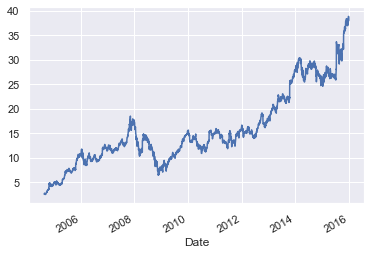

In [224]:
goog.plot()

## Resampling and converting frequencies

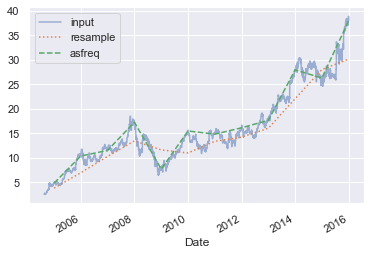

In [225]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')


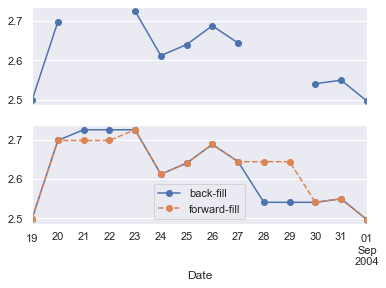

In [226]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])


## Time-shifts

C:\Users\Vadim\AppData\Local\Temp\ipykernel_5188\470826231.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


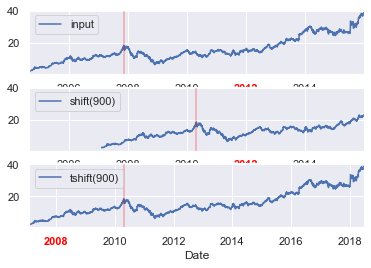

In [227]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

C:\Users\Vadim\AppData\Local\Temp\ipykernel_5188\2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


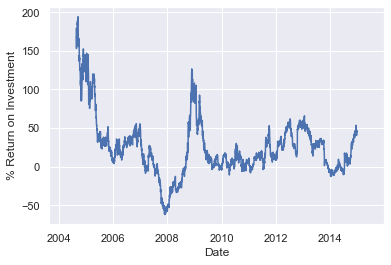

In [228]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

## Rolling windows

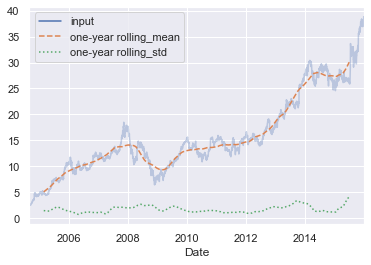

In [229]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


# High-Performance Pandas: eval() and query()

## Motivation

In [230]:
rng = np.random.RandomState(42)
x = rng.rand(int(1e6))
y = rng.rand(int(1e6))
%timeit x + y

3.41 ms ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [231]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))


237 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [232]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [233]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

## pandas.eval() for Efficient Operations

In [234]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))


In [235]:
%timeit df1 + df2 + df3 + df4

89.7 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [236]:
%timeit pd.eval('df1 + df2 + df3 + df4')

40.1 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [237]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))


True

### Operations supported by pd.eval()

In [238]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))


In [239]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [240]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [241]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [242]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [243]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

## DataFrame.eval() for Column-Wise Operations

In [244]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [245]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [246]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

## Assignment in DataFrame.eval()

In [247]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [248]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [249]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


## Local variables in DataFrame.eval()

In [250]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query() Method

In [251]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [252]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [253]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

## Performance: When to Use These Functions

Frames will result in implicit creation of temporary arrays: For example, this:

```python
x = df[(df.A < 0.5) & (df.B < 0.5)]
```


is roughly equivalent to this:

```python
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]
```

In [254]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

df.values.nbytes

32000